In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
features, targets = make_classification(n_samples = 40,
                                      n_features = 3,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

In [3]:
df = pd.DataFrame(data=features, columns=['x1', 'x2', 'x3'])
df['targets'] = targets
df.head()

,x1,x2,x3,targets
0,-0.222328,-1.463531,-0.200758,0
1,0.285587,-1.253742,0.885141,0
2,2.185575,-0.694550,-1.396496,0
3,-0.670662,0.845027,0.377564,1
4,0.740556,1.118117,-0.953701,1


In [4]:
df

,x1,x2,x3,targets
0,-0.222328,-1.463531,-0.200758,0
1,0.285587,-1.253742,0.885141,0
2,2.185575,-0.694550,-1.396496,0
3,-0.670662,0.845027,0.377564,1
4,0.740556,1.118117,-0.953701,1
5,-0.266219,1.145281,0.032615,1
6,0.160037,-0.125222,0.876169,0
7,0.198300,0.803236,0.119009,1
8,0.512930,-2.162860,-0.298093,0
9,-0.620001,1.046047,0.698032,1


In [5]:
features.shape

(40, 3)

In [6]:
targets.shape

(40,)

In [7]:
np.bincount(targets)

array([20, 20])

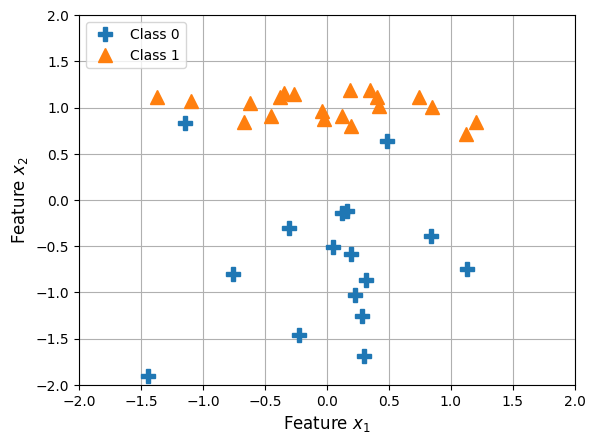

In [8]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [10]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 3)
ppn.weights

[0.0, 0.0, 0.0]

In [11]:
ppn.bias

0

In [12]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2) # Re-initialize with 2 features
x = [1.23, 2.13, 3.14]
ppn.forward(x)

0

In [13]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    # def update(self, x, y_true):
    #     prediction = self.forward(x)
    #     error = y_true - prediction

    #     self.bias += error
    #     for i, _ in enumerate(self.weights):
    #         self.weights[i] += error * x[i]

    #     return error

ppn = Perceptron(num_features = 2)
x = [1.1, 2.1]
# ppn.update(x, y_true = 1)


Our prediction will be zero because the weight and bias is 

In [14]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [0.0, 0.0]
Bias: 0


In [15]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        # for x, y in zip(X_train, y_train):
        #     error = model.update(x, y)
        #     error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [17]:
ppn = Perceptron(num_features = 3)
train(ppn, features, targets, epochs = 10)

Epoch 1 errors 0
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0
Epoch 6 errors 0
Epoch 7 errors 0
Epoch 8 errors 0
Epoch 9 errors 0
Epoch 10 errors 0


In [18]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [19]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.5


In [20]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    # z = w1*x1 + w2*x2 + b = 0
    # => x2 = (-w1*x1 - b) / w2

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

In [21]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

# Plot the decision boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

ZeroDivisionError: float division by zero